### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Data

In [2]:
df = pd.read_csv("train.csv")
df.shape

(1460, 81)

### Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#ratio of null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False).head(20)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


In [5]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 43
Numerical Features in Train Set: 38


## Data Cleaning

In [6]:
missing_value_df.sort_values('percent_missing',ascending=False).head(20)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


### 'PoolQc'

In [7]:
df['PoolQC'].fillna('No Pool', inplace=True) 

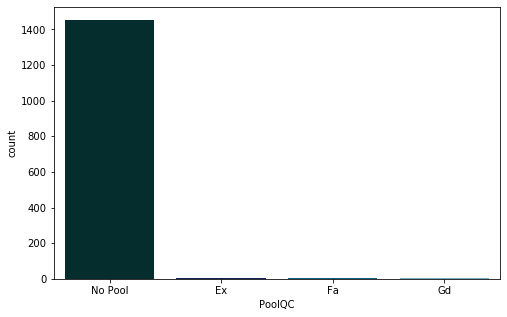

In [8]:
plt.figure(figsize=(8,5))
sns.countplot('PoolQC',data=df,palette='ocean')

#### There is No Pool in more than 99% of the houses

### MiscFeature

In [9]:
df['MiscFeature'].fillna('No Feature', inplace=True) 

### Alley

In [10]:
df['Alley'].fillna('No Alley', inplace=True) 

### Fence

In [11]:
df['Fence'].fillna('No Fence', inplace=True) 

### FireplaceQu

In [12]:
df.FireplaceQu.dtype

dtype('O')

In [13]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### Since the FireplaceQu is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [14]:
#Imputing with Mode
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

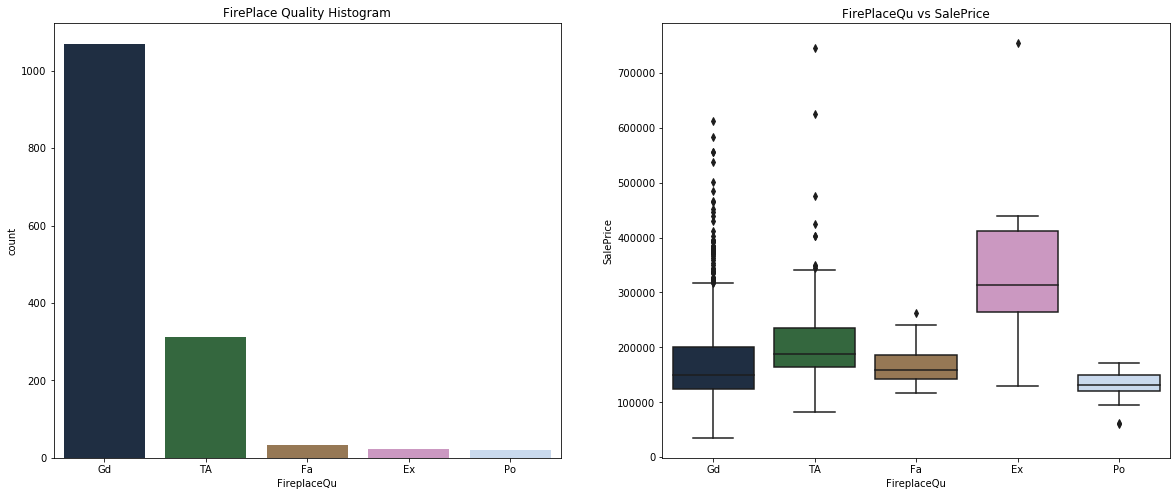

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('FirePlace Quality Histogram')
sns.countplot(df.FireplaceQu, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('FirePlaceQu vs SalePrice')
sns.boxplot(x=df.FireplaceQu, y=df.SalePrice, palette=("cubehelix"))

plt.show()

### LotFrontage

In [16]:
df.LotFrontage.dtype

dtype('float64')

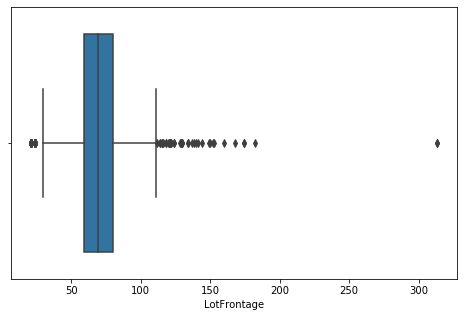

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot('LotFrontage',data=df)

### Outlier Treatment in 'LotFrontage' column

In [18]:
Q1=df['LotFrontage'].quantile(0.25)
Q3=df['LotFrontage'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

59.0
80.0
21.0
27.5 111.5


In [19]:
df = df[df['LotFrontage']< Upper_Whisker]

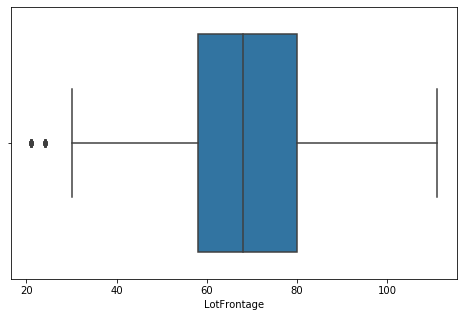

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('LotFrontage',data=df)

In [21]:
df = df[df['LotFrontage']> Lower_Whisker]

In [22]:
df.shape

(1113, 81)

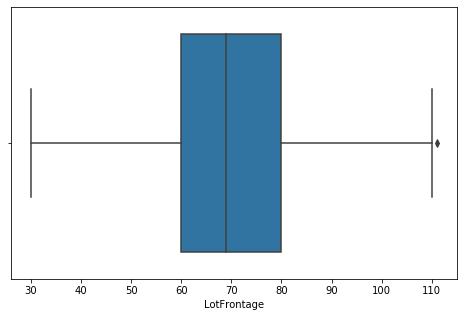

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot('LotFrontage',data=df)

In [24]:
df['LotFrontage'].isna().sum()

0

In [25]:
#ratio of null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False).head(10)

,column_name,percent_missing
GarageYrBlt,GarageYrBlt,5.929919
GarageCond,GarageCond,5.929919
GarageFinish,GarageFinish,5.929919
GarageQual,GarageQual,5.929919
GarageType,GarageType,5.929919
BsmtExposure,BsmtExposure,2.875112
BsmtFinType2,BsmtFinType2,2.875112
BsmtCond,BsmtCond,2.785265
BsmtFinType1,BsmtFinType1,2.785265
BsmtQual,BsmtQual,2.785265


### GarageType

In [26]:
df.GarageType.dtype

dtype('O')

In [27]:
df.GarageType.value_counts()

Attchd     647
Detchd     314
BuiltIn     61
Basment     12
CarPort      8
2Types       5
Name: GarageType, dtype: int64

#### Since the GarageType is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [28]:
#Imputing with Mode
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])

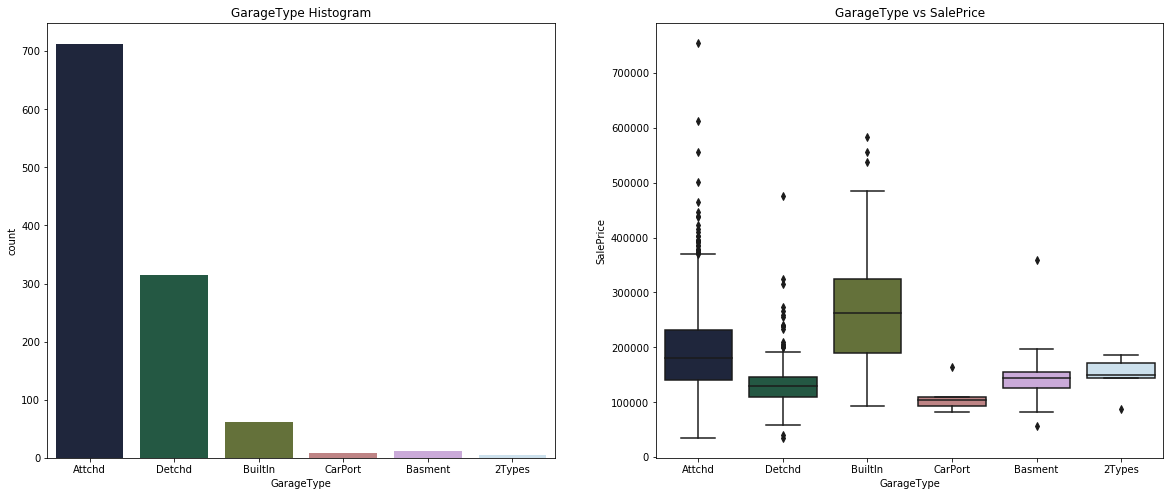

In [29]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('GarageType Histogram')
sns.countplot(df.GarageType, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('GarageType vs SalePrice')
sns.boxplot(x=df.GarageType, y=df.SalePrice, palette=("cubehelix"))

plt.show()

### GarageYrBlt

In [30]:
df.GarageYrBlt.dtype
df.GarageYrBlt.describe()

count    1047.000000
mean     1978.388730
std        26.137648
min      1900.000000
25%      1959.000000
50%      1982.000000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

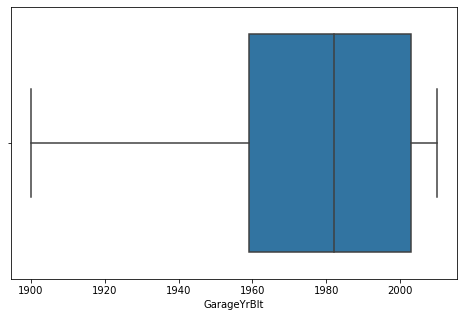

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot('GarageYrBlt',data=df)

#### The Box Plot above clearly show NO "Outliers" and hence we can impute the missing values with "Mean"

In [32]:
#Imputing with Mean
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

### GarageFinish

In [33]:
df.GarageFinish.dtype
df.GarageFinish.value_counts()

Unf    463
RFn    322
Fin    262
Name: GarageFinish, dtype: int64

#### Since the GarageFinish is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [34]:
#Imputing with Mode
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

### GarageQual

In [35]:
df.GarageFinish.dtype
df.GarageFinish.value_counts()

Unf    529
RFn    322
Fin    262
Name: GarageFinish, dtype: int64

#### Since the GarageQual is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [36]:
#Imputing with Mode
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])

### GarageCond

In [37]:
df.GarageFinish.dtype
df.GarageFinish.value_counts()

Unf    529
RFn    322
Fin    262
Name: GarageFinish, dtype: int64

#### Since the GarageFinish is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [38]:
#Imputing with Mode
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [39]:
#ratio of null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False).head(10)

,column_name,percent_missing
GarageCond,GarageCond,5.929919
BsmtExposure,BsmtExposure,2.875112
BsmtFinType2,BsmtFinType2,2.875112
BsmtFinType1,BsmtFinType1,2.785265
BsmtQual,BsmtQual,2.785265
BsmtCond,BsmtCond,2.785265
MasVnrType,MasVnrType,0.539084
MasVnrArea,MasVnrArea,0.539084
Electrical,Electrical,0.089847
Fireplaces,Fireplaces,0.000000


### GarageCond

In [40]:
df.GarageFinish.dtype
df.GarageFinish.value_counts()

Unf    529
RFn    322
Fin    262
Name: GarageFinish, dtype: int64

#### Since the GarageCond is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [41]:
#Imputing with Mode
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])

### BsmtExposure

In [42]:
df.BsmtExposure.dtype
df.BsmtExposure.value_counts()

No    735
Av    166
Gd     93
Mn     87
Name: BsmtExposure, dtype: int64

#### Since the BsmtExposure is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [43]:
#Imputing with Mode
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

### BsmtFinType2

In [44]:
df.BsmtFinType2.dtype
df.BsmtFinType2.value_counts()

Unf    965
Rec     35
LwQ     33
BLQ     25
ALQ     12
GLQ     11
Name: BsmtFinType2, dtype: int64

#### Since the BsmtFinType2 is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [45]:
#Imputing with Mode
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

### BsmtFinType1

In [46]:
df.BsmtFinType1.dtype
df.BsmtFinType1.value_counts()

Unf    354
GLQ    316
ALQ    153
Rec    105
BLQ     97
LwQ     57
Name: BsmtFinType1, dtype: int64

#### Since the BsmtFinType1 is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [47]:
#Imputing with Mode
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

### BsmtQual

In [48]:
df.BsmtQual.dtype
df.BsmtQual.value_counts()

TA    494
Gd    451
Ex    104
Fa     33
Name: BsmtQual, dtype: int64

#### Since the BsmtQual is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [49]:
#Imputing with Mode
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

### BsmtCond

In [50]:
df.BsmtCond.dtype
df.BsmtCond.value_counts()

TA    989
Gd     52
Fa     40
Po      1
Name: BsmtCond, dtype: int64

#### Since the BsmtCond is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [51]:
#Imputing with Mode
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

### MasVnrType

In [52]:
df.MasVnrType.dtype
df.MasVnrType.value_counts()

None       681
BrkFace    306
Stone      111
BrkCmn       9
Name: MasVnrType, dtype: int64

#### Since the MasVnrType is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [53]:
#Imputing with Mode
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

### MasVnrArea

In [54]:
df.MasVnrArea.dtype
df.MasVnrArea.value_counts()

0.0      681
108.0      7
120.0      6
16.0       6
72.0       6
        ... 
975.0      1
361.0      1
459.0      1
261.0      1
860.0      1
Name: MasVnrArea, Length: 260, dtype: int64

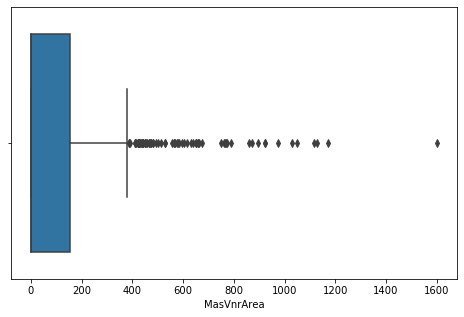

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot('MasVnrArea',data=df)

### Outlier Treatment in 'MasVnrArea' column

In [56]:
Q1 = df['MasVnrArea'].quantile(0.1)
Q3 = df['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
320.0
320.0
-480.0 800.0


In [57]:
# outlier treatment
df = df[(df['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (df['MasVnrArea'] <= Q3 + 1.5*IQR)]
df.shape

(1095, 81)

In [58]:
df['MasVnrArea'].isna().sum()

0

### Electrical

In [59]:
df.Electrical.dtype
df.Electrical.value_counts()

SBrkr    986
FuseA     79
FuseF     25
FuseP      3
Mix        1
Name: Electrical, dtype: int64

#### Since the Electrical is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [60]:
#Imputing with Mode
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])

In [61]:
#ratio of null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False).head(10)

,column_name,percent_missing
Id,Id,0.0
CentralAir,CentralAir,0.0
GarageYrBlt,GarageYrBlt,0.0
GarageType,GarageType,0.0
FireplaceQu,FireplaceQu,0.0
Fireplaces,Fireplaces,0.0
Functional,Functional,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0.0
KitchenQual,KitchenQual,0.0
KitchenAbvGr,KitchenAbvGr,0.0


In [62]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,727.783562,53.707763,68.839269,9732.042009,6.086758,5.582648,1969.593607,1985.007306,88.442922,417.889498,...,89.851142,45.893151,23.302283,3.126941,15.979909,1.591781,27.446575,6.372603,2007.799087,179187.450228
std,421.349753,39.121366,16.477721,4592.790346,1.389027,1.106021,32.298088,21.484826,149.539495,432.057293,...,121.008939,65.255373,60.693094,29.315303,57.912273,30.508586,197.939192,2.712955,1.331588,77852.831347
min,1.000000,20.000000,30.000000,2268.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,374.500000,20.000000,60.000000,7597.500000,5.000000,5.000000,1949.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128000.000000
50%,719.000000,50.000000,69.000000,9245.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,351.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,158500.000000
75%,1093.500000,70.000000,80.000000,11044.500000,7.000000,6.000000,2003.000000,2004.000000,143.000000,690.000000,...,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,1460.000000,190.000000,111.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,788.000000,2188.000000,...,857.000000,547.000000,386.000000,508.000000,480.000000,648.000000,3500.000000,12.000000,2010.000000,611657.000000


In [64]:
#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.columns)

Numerical Features in Train Set: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [65]:
#converting from int type to object to treat the variables as categorical variables
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

### Data Visualization

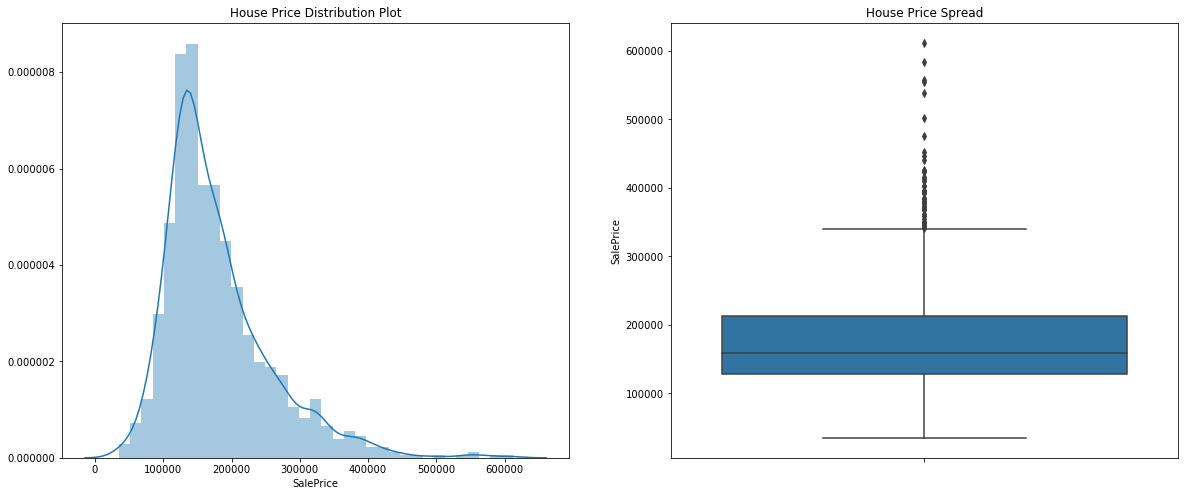

In [66]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.SalePrice)

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=df.SalePrice)

plt.show()

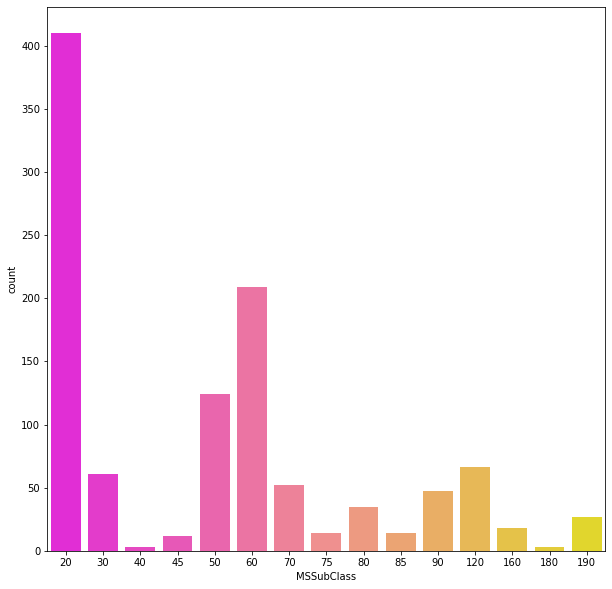

In [67]:
plt.figure(figsize=(10,10))
sns.countplot('MSSubClass',data=df,palette='spring')

#### Here we observe that "1-STORY 1946 & NEWER ALL STYLES" type of dwelling involved in the more sale.

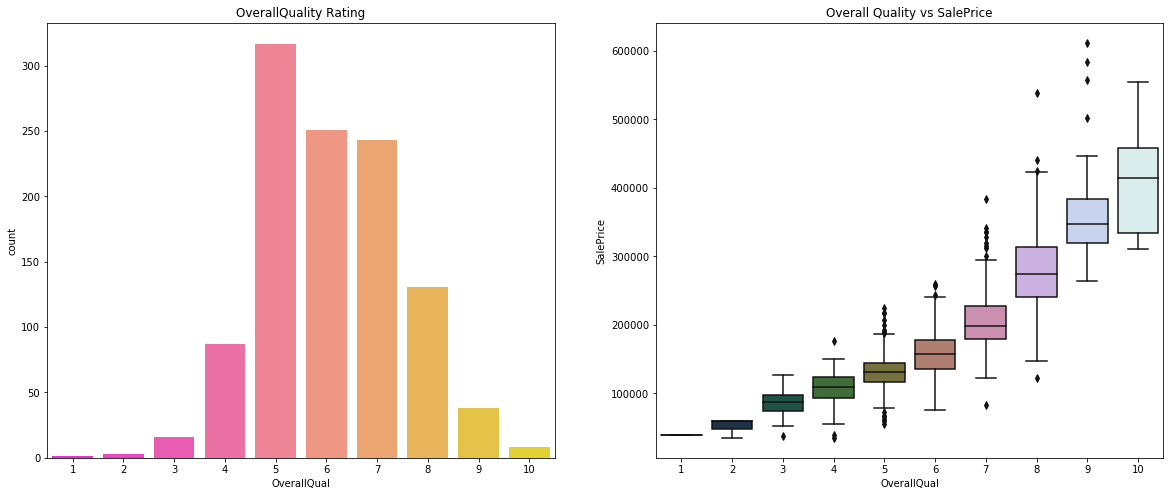

In [68]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('OverallQuality Rating')
sns.countplot(df.OverallQual, palette=("spring"))

plt.subplot(1,2,2)
plt.title('Overall Quality vs SalePrice')
sns.boxplot(x=df.OverallQual, y=df.SalePrice, palette=("cubehelix"))

plt.show()

The overall material and finish of the house Quality rates from "Average" to "Good" and also we can clearly observe that Overall Quality is significant variable to decide SalePrice of house.

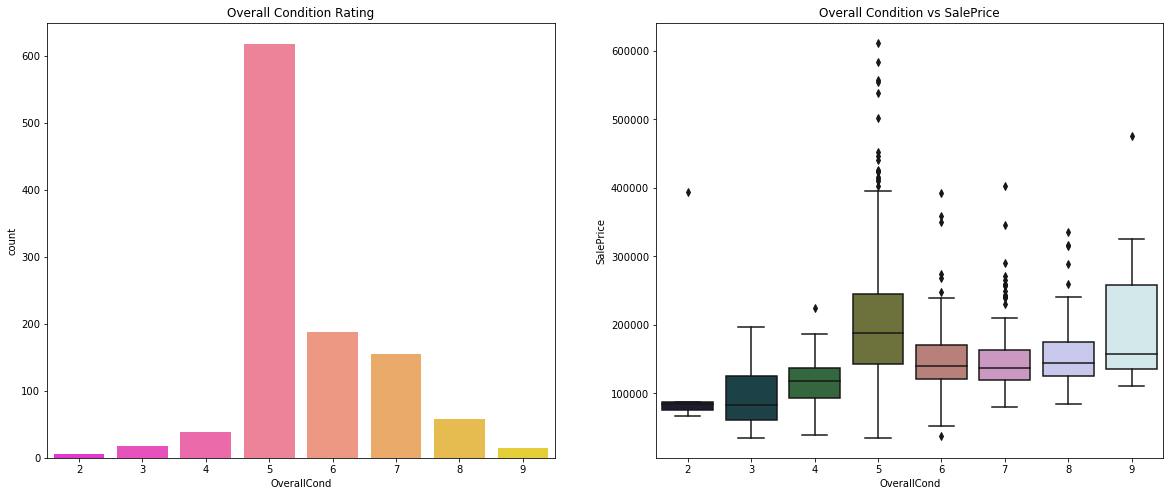

In [69]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Overall Condition Rating')
sns.countplot(df.OverallCond, palette=("spring"))

plt.subplot(1,2,2)
plt.title('Overall Condition vs SalePrice')
sns.boxplot(x=df.OverallCond, y=df.SalePrice, palette=("cubehelix"))

plt.show()

Theoverall condition of the house condition rates "Average" is more in count and also we can clearly observe that Overall Condition is significant variable to decide SalePrice of house.

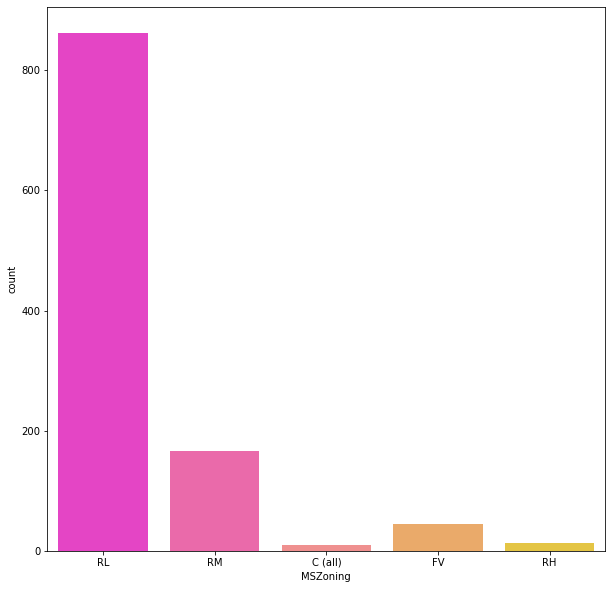

In [70]:
plt.figure(figsize=(10,10))
sns.countplot('MSZoning',data=df,palette='spring')

#### Here we observe that Residential Low Density(RL) is more favoured house zoning

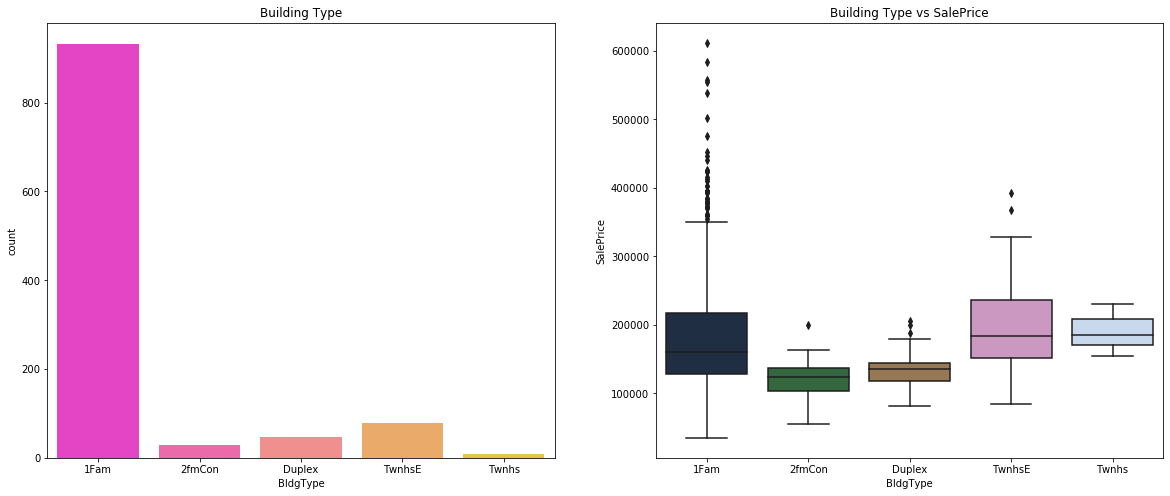

In [71]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Building Type')
sns.countplot(df.BldgType, palette=("spring"))

plt.subplot(1,2,2)
plt.title('Building Type vs SalePrice')
sns.boxplot(x=df.BldgType, y=df.SalePrice, palette=("cubehelix"))

plt.show()

Here we observe that "1Fam	Single-family Detached" buildings are high but Sale Price of "TwnhsI	Townhouse Inside Unit" and "TwnhsE	Townhouse End Unit" is more 

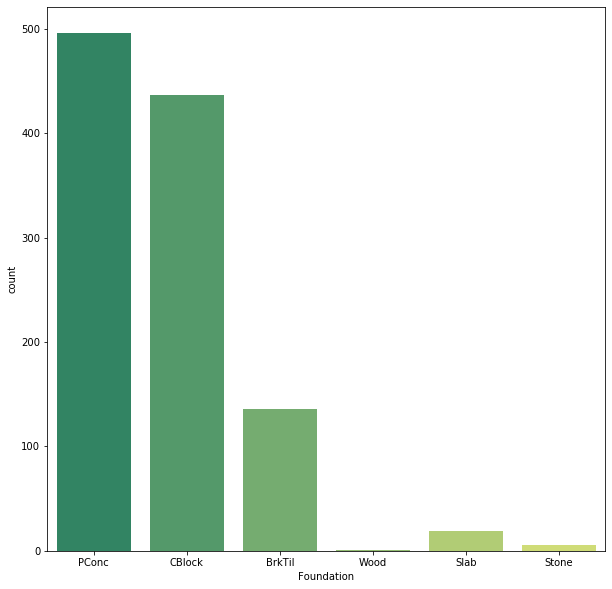

In [72]:
plt.figure(figsize=(10,10))
sns.countplot('Foundation',data=df,palette='summer')

#### Here we observe that "Poured Contrete" and "Cinder Block" are favoured Foundation of houses

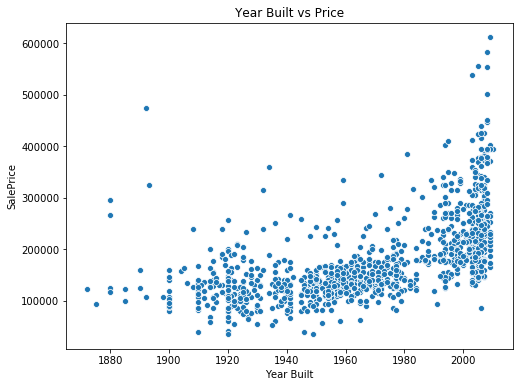

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize=(8,6))

plt.title('Year Built vs Price')
sns.scatterplot(x=df['YearBuilt'],y=df['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('SalePrice')

plt.show()
plt.tight_layout()

Here we can observe that SalePrice is high for houses which were built after 2000

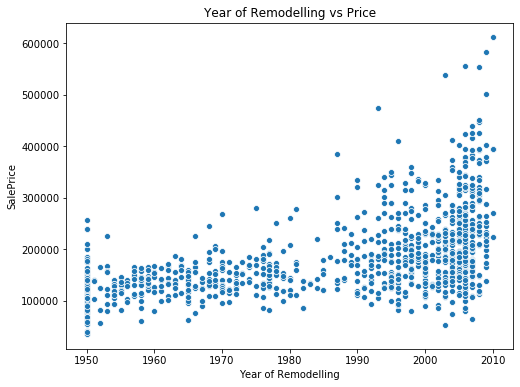

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(8,6))

plt.title('Year of Remodelling vs Price')
sns.scatterplot(x=df['YearRemodAdd'],y=df['SalePrice'])
plt.xlabel('Year of Remodelling')
plt.ylabel('SalePrice')

plt.show()
plt.tight_layout()

Here we can observe that SalePrice is high for houses which were Remodelled after 2000

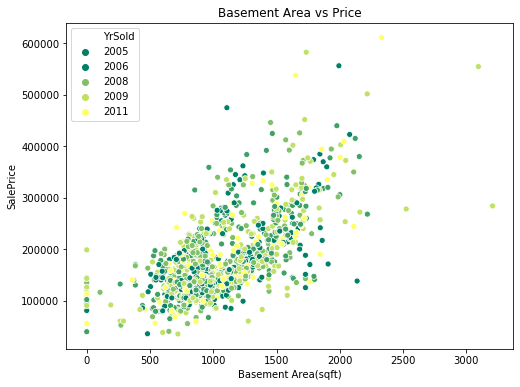

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize=(8,6))

plt.title('Basement Area vs Price')
sns.scatterplot(x=df['TotalBsmtSF'],y=df['SalePrice'],hue=df['YrSold'],palette='summer')
plt.xlabel('Basement Area(sqft)')
plt.ylabel('SalePrice')

plt.show()
plt.tight_layout()

### Data Preparation for Model Building

In [76]:
# creating dummy variables for categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,2,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,3,TA,TA,Y,No Pool,No Fence,No Feature,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,3,TA,TA,Y,No Pool,No Fence,No Feature,WD,Normal


In [77]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
# drop categorical variables 
df = df.drop(list(df_categorical.columns), axis=1)
df.shape

(1095, 26)

In [79]:
# concat dummy variables with X
df = pd.concat([df, df_dummies], axis=1)
df.shape

(1095, 294)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1459
Columns: 294 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(23), uint8(268)
memory usage: 557.6 KB


In [81]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64,np.uint8])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 0
Numerical Features in Train Set: 294


### Model Building

In [82]:
# Seperate Features and Target
X= df.drop(columns = ['SalePrice'], axis=1)
y= df['SalePrice']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size = 0.2, random_state=42)

In [84]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.07497671,  0.63975668, -0.06101546, ..., -0.11785113,
         0.49964324, -0.34255939],
       [-1.29743157, -0.57975556,  0.10458643, ..., -0.11785113,
         0.49964324, -0.34255939],
       [-1.4710487 , -0.51877995, -0.53962536, ..., -0.11785113,
         0.49964324, -0.34255939],
       ...,
       [-0.5958281 , -1.18951168, -1.51258757, ..., -0.11785113,
         0.49964324, -0.34255939],
       [ 0.84305359,  0.94463474,  0.1381157 , ..., -0.11785113,
         0.49964324, -0.34255939],
       [-1.73742019, -0.09195067,  0.27632172, ..., -0.11785113,
         0.49964324, -0.34255939]])

## MODEL BUILDING USING RFE and VIF

In [85]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [87]:
pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=['Column','rfe_support','rfe_ranking'])

,Column,rfe_support,rfe_ranking
0,Id,False,239
1,LotFrontage,False,224
2,LotArea,False,240
3,YearBuilt,False,213
4,YearRemodAdd,False,228
...,...,...,...
288,SaleCondition_AdjLand,False,52
289,SaleCondition_Alloca,False,193
290,SaleCondition_Family,False,147
291,SaleCondition_Normal,False,64


In [88]:
X_train.columns[rfe.support_]

Index(['MSSubClass_160', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_3', 'RoofMatl_Membran', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'ExterCond_Po', 'BsmtExposure_Gd', 'Heating_Grav',
       'Heating_OthW', 'FullBath_3', 'BedroomAbvGr_5', 'BedroomAbvGr_6',
       'BedroomAbvGr_8', 'KitchenAbvGr_1', 'KitchenAbvGr_2', 'TotRmsAbvGrd_8',
       'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_12', 'TotRmsAbvGrd_14', 'Functional_Maj2',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'PoolQC_No Pool', 'MiscFeature_TenC', 'SaleCo

## Building model using statsmodel, for the detailed statistics

In [89]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,MSSubClass_160,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,OverallQual_3,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_No Pool,MiscFeature_TenC,SaleCondition_Partial
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
753,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1420,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1208,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [90]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [91]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     99.57
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          2.91e-310
Time:                        15:18:42   Log-Likelihood:                -10288.
No. Observations:                 876   AIC:                         2.068e+04
Df Residuals:                     826   BIC:                         2.092e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.741e+

#### p-value of "ExterCond_Po" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables

In [92]:
X_train_new = X_train_rfe.drop(["ExterCond_Po"], axis = 1)
X_train_new.head()

,MSSubClass_160,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,OverallQual_3,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_No Pool,MiscFeature_TenC,SaleCondition_Partial
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
753,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1420,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1208,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


### MODEL 2

In [93]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     101.7
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          4.17e-311
Time:                        15:18:43   Log-Likelihood:                -10289.
No. Observations:                 876   AIC:                         2.068e+04
Df Residuals:                     827   BIC:                         2.091e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.703e+

#### p-value of "RoofMatl_Membran" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [94]:
X_train_new = X_train_new.drop(["RoofMatl_Membran"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_No Pool,MiscFeature_TenC,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
753,1.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1093,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1420,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1208,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


### MODEL 3

In [95]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          7.38e-312
Time:                        15:18:43   Log-Likelihood:                -10289.
No. Observations:                 876   AIC:                         2.067e+04
Df Residuals:                     828   BIC:                         2.090e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.669e+

#### p-value of "LandSlope_Sev" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [96]:
X_train_new = X_train_new.drop(["LandSlope_Sev"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,OverallQual_3,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_No Pool,MiscFeature_TenC,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1093,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1420,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1208,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


### MODEL 4

In [97]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     106.0
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          1.04e-312
Time:                        15:18:43   Log-Likelihood:                -10290.
No. Observations:                 876   AIC:                         2.067e+04
Df Residuals:                     829   BIC:                         2.090e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.751e+

#### p-value of "PoolQC_No Pool" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [98]:
X_train_new = X_train_new.drop(["PoolQC_No Pool"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,OverallQual_3,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,MiscFeature_TenC,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1093,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1420,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1208,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### MODEL 5

In [99]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     108.3
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          2.24e-313
Time:                        15:18:43   Log-Likelihood:                -10291.
No. Observations:                 876   AIC:                         2.067e+04
Df Residuals:                     830   BIC:                         2.089e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.83e+

#### p-value of "MiscFeature_TenC" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [100]:
X_train_new = X_train_new.drop(["MiscFeature_TenC"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,OverallQual_3,...,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1093,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1420,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1208,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### MODEL 6

In [101]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     110.6
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          4.93e-314
Time:                        15:18:43   Log-Likelihood:                -10292.
No. Observations:                 876   AIC:                         2.067e+04
Df Residuals:                     831   BIC:                         2.089e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.825e+

#### p-value of "OverallQual_3" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [102]:
X_train_new = X_train_new.drop(["OverallQual_3"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,OverallQual_4,...,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1093,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1420,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1208,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### MODEL 7

In [103]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     113.0
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          1.21e-314
Time:                        15:18:44   Log-Likelihood:                -10293.
No. Observations:                 876   AIC:                         2.067e+04
Df Residuals:                     832   BIC:                         2.088e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.242e+

#### p-value of "OverallQual_4" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [104]:
X_train_new = X_train_new.drop(["OverallQual_4"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,OverallQual_5,...,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1093,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1420,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1208,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


### MODEL 8

In [105]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          5.59e-315
Time:                        15:18:44   Log-Likelihood:                -10294.
No. Observations:                 876   AIC:                         2.067e+04
Df Residuals:                     833   BIC:                         2.088e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.852e+

#### p-value of "HouseStyle_2.5Fin" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [106]:
X_train_new = X_train_new.drop(["HouseStyle_2.5Fin"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,OverallQual_5,OverallQual_6,...,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1093,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1420,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1208,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### MODEL 9

In [107]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     117.7
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          2.48e-315
Time:                        15:18:44   Log-Likelihood:                -10296.
No. Observations:                 876   AIC:                         2.068e+04
Df Residuals:                     834   BIC:                         2.088e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.929e+

#### p-value of "BedroomAbvGr_6" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [108]:
X_train_new = X_train_new.drop(["BedroomAbvGr_6"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,OverallQual_5,OverallQual_6,...,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1093,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1420,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1208,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### MODEL 10

In [109]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     120.2
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          1.34e-315
Time:                        15:18:44   Log-Likelihood:                -10298.
No. Observations:                 876   AIC:                         2.068e+04
Df Residuals:                     835   BIC:                         2.087e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.005e+

In [110]:
checkVIF(X_train_new)

C:\Users\NaveenKumarReddyNare\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
23,BedroomAbvGr_8,inf
31,TotRmsAbvGrd_14,inf
0,const,1310.08
40,GarageCond_TA,86.44
36,GarageQual_TA,70.83
37,GarageCond_Fa,59.86
33,GarageQual_Fa,53.64
24,KitchenAbvGr_1,18.22
25,KitchenAbvGr_2,18.05
39,GarageCond_Po,17.63


#### A high VIF indicates that the associated independent variable is highly collinear i.e., high multi-collinearity with the other variables in the model.
#### So drop the features "BedroomAbvGr_8" and "TotRmsAbvGrd_14" with inf VIF

In [111]:
X_train_new = X_train_new.drop(["BedroomAbvGr_8","TotRmsAbvGrd_14"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,OverallQual_5,OverallQual_6,...,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1093,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1420,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1208,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [112]:
checkVIF(X_train_new)

,Features,VIF
0,const,1309.99
38,GarageCond_TA,86.44
34,GarageQual_TA,70.83
35,GarageCond_Fa,59.85
31,GarageQual_Fa,53.64
23,KitchenAbvGr_1,18.22
24,KitchenAbvGr_2,18.03
37,GarageCond_Po,17.62
17,ExterQual_TA,15.74
32,GarageQual_Gd,14.21


Here VIF of GarageCond_TA is very High , lets drop that variable

In [113]:
X_train_new = X_train_new.drop(["GarageCond_TA"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,OverallQual_5,OverallQual_6,...,TotRmsAbvGrd_12,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1093,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1420,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1208,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [114]:
checkVIF(X_train_new)

,Features,VIF
0,const,1004.68
34,GarageQual_TA,28.46
31,GarageQual_Fa,22.39
23,KitchenAbvGr_1,18.22
24,KitchenAbvGr_2,18.03
17,ExterQual_TA,15.33
16,ExterQual_Gd,12.25
32,GarageQual_Gd,6.40
33,GarageQual_Po,4.36
10,OverallQual_7,3.95


Here VIF of GarageQual_TA is very High , lets drop that variable

In [115]:
X_train_new = X_train_new.drop(["GarageQual_TA"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,OverallQual_5,OverallQual_6,...,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1420,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1208,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
checkVIF(X_train_new)

,Features,VIF
0,const,421.47
23,KitchenAbvGr_1,18.22
24,KitchenAbvGr_2,18.03
17,ExterQual_TA,15.02
16,ExterQual_Gd,11.96
10,OverallQual_7,3.95
11,OverallQual_8,3.86
8,OverallQual_5,2.96
9,OverallQual_6,2.85
12,OverallQual_9,2.64


Here VIF of KitchenAbvGr_1 is High , lets drop that variable

In [117]:
X_train_new = X_train_new.drop(["KitchenAbvGr_1"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,OverallQual_5,OverallQual_6,...,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1420,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1208,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
checkVIF(X_train_new)

,Features,VIF
0,const,74.43
17,ExterQual_TA,15.00
16,ExterQual_Gd,11.95
10,OverallQual_7,3.94
11,OverallQual_8,3.84
8,OverallQual_5,2.96
9,OverallQual_6,2.85
12,OverallQual_9,2.63
32,GarageQual_Po,2.42
35,GarageCond_Po,2.34


Here VIF of ExterQual_TA is High , lets drop that variable

In [119]:
X_train_new = X_train_new.drop(["ExterQual_TA"], axis = 1)
X_train_new.head()

,const,MSSubClass_160,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,OverallQual_5,OverallQual_6,...,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Functional_Maj2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,SaleCondition_Partial
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1420,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1208,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
checkVIF(X_train_new)

,Features,VIF
0,const,11.93
10,OverallQual_7,3.84
11,OverallQual_8,3.70
8,OverallQual_5,2.96
9,OverallQual_6,2.84
31,GarageQual_Po,2.42
34,GarageCond_Po,2.34
16,ExterQual_Gd,2.26
12,OverallQual_9,2.14
5,Neighborhood_NridgHt,1.60


### Residual Analysis of Model

In [121]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

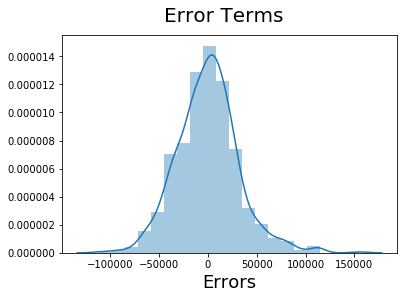

In [122]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

#### Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [123]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [124]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [125]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
print("Mean Squared Error: ",mse)
#print("Mean Squared Error: ",np.square(np.subtract(y_test,y_pred)).mean())

Mean Squared Error:  1043645867.5438266


In [126]:
# Calculate R square vale
from sklearn.metrics import r2_score
rsq = r2_score(y_test,y_pred)
print("R Square Value: ",rsq)

R Square Value:  0.7682123944720236


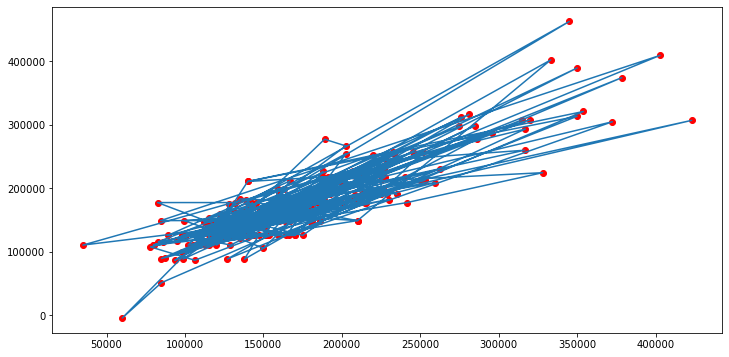

In [127]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_pred)
plt.show()

Text(0, 0.5, 'y_pred')

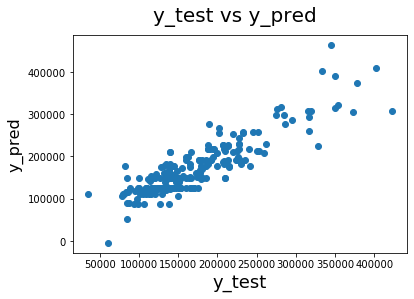

In [128]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [129]:
X_test_new = X_test_new.drop("const",axis=1)

### GridSearchCV

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 100, 500, 1000 ]}

### LASSO(L1) REGULARIZATION

In [132]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [136]:
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        
                        cv = folds, 
                        return_train_score=True,
                        verbose = 0) 
model_cv.fit(X_train_new,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [148]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','mean_test_score','mean_train_score']].sort_values('mean_test_score',ascending=False)

,param_alpha,mean_test_score,mean_train_score
19,7,0.905253,0.948619
20,8,0.905209,0.947514
18,6,0.905171,0.949806
21,9,0.905080,0.946475
17,5,0.904901,0.951091
22,10,0.904890,0.945495
16,4,0.904329,0.952503
15,3,0.903237,0.954085
23,20,0.901811,0.937704
14,2,0.901117,0.955922


In [138]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.3}
0.803449829836897


In [139]:
alpha = 0.3

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
print("Training Score: ",lasso.score(X_train_new,y_train))
print("Testing Score: ",lasso.score(X_test_new,y_test))

Training Score:  0.8419908837468891
Testing Score:  0.768260551828778


### RIDGE (L2)REGULARIZATION

In [141]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [142]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                
                        cv = folds, 
                        return_train_score=True,
                        verbose = 0)            
model_cv.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [145]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha','mean_test_score','mean_train_score']].sort_values('mean_test_score',ascending=False)

,param_alpha,mean_test_score,mean_train_score
19,7,0.905253,0.948619
20,8,0.905209,0.947514
18,6,0.905171,0.949806
21,9,0.905080,0.946475
17,5,0.904901,0.951091
22,10,0.904890,0.945495
16,4,0.904329,0.952503
15,3,0.903237,0.954085
23,20,0.901811,0.937704
14,2,0.901117,0.955922


In [144]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 7.0}
0.9052525599879463


In [146]:
alpha = 7.0

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train_new, y_train) 

Ridge(alpha=7.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [147]:
print("Training Score: ",ridge.score(X_train_new,y_train))
print("Testing Score: ",ridge.score(X_test_new,y_test))

Training Score:  0.8075050309962569
Testing Score:  0.7607400015663985
